In [172]:
import os

# I saved all PDF files under the PDF folder in my env directory
pdf_docs_path = os.path.join("PDF")
one_pdf_path = os.path.join(pdf_docs_path,"protect-your-home-from-snow-ice-storms.pdf")


In [173]:
# Trying a better result with pdftotext
import pdftotext

with open(one_pdf_path, "rb") as f:
    pdf = pdftotext.PDF(f)
    
print("This file has", len(pdf), "pages.")

This file has 16 pages.


In [174]:
# PDFtoText is much better than PyPDF, with automatic ligature conversion!
# Now we can get rid of new lines and stray spaces

import re

docText = ""
for page in pdf:
    docText = docText + re.sub('\s+', ' ', page).strip()

In [175]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
import string
stop_words=set(stopwords.words("english"))
stop_words.add("pp")
stop_words.add("g")
stop_words.add("chapter")

lemmatizer = WordNetLemmatizer() 

# Tokenize, clean and create a list of lemmatized nouns from the text:
docSent = sent_tokenize(docText)

nounsList = []
for sentence in docSent:
    text=word_tokenize(sentence)
    posTaggedSentence = nltk.pos_tag(text) 
    for word in posTaggedSentence:
        if (word[1] == 'NN' or word[1] == 'NNS') and word[0].isalpha() and not word[0] in stop_words and not word[0] in string.punctuation:
            # Lemmatize and append
            nounsList.append(lemmatizer.lemmatize(word[0].lower()))
            if word[0] in stop_words or word[0] in string.punctuation:
                print(word[0])

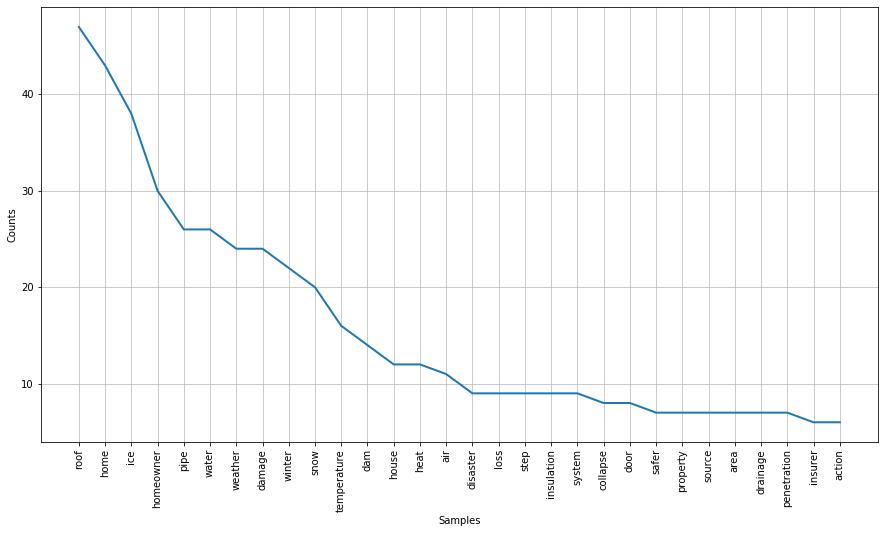

In [176]:
from matplotlib import pyplot as plt
from nltk.probability import FreqDist

nounsFreqDistribution = FreqDist(nounsList)
plt.figure(figsize=(15,8))
nounsFreqDistribution.plot(30,cumulative=False)
plt.show()

In [177]:
nounsFreqDistribution

FreqDist({'roof': 47, 'home': 43, 'ice': 38, 'homeowner': 30, 'pipe': 26, 'water': 26, 'weather': 24, 'damage': 24, 'winter': 22, 'snow': 20, ...})

In [178]:
listOfWords=""
for word in nounsFreqDistribution.most_common(50):
    listOfWords = listOfWords + word[0] + ", "
print (listOfWords)

roof, home, ice, homeowner, pipe, water, weather, damage, winter, snow, temperature, dam, house, heat, air, disaster, loss, step, insulation, system, collapse, door, safer, property, source, area, drainage, penetration, insurer, action, ceiling, living, program, leak, snap, period, slope, cable, wall, fixture, gutter, debris, snowfall, cold, line, power, government, inspector, load, obstruction, 


Now, what if we devise a dictionary of relevant nouns that apply to disaster types, and constrain the results to that list? Let's try with this...

In [180]:
dictionary = ["snow","change","climate","heatwave","adaptation","tornado","water","icestorm","risk","impact","level","community","land","management","planning","development","http","plan","infrastructure","sea","event","action","vulnerability","flood","assessment","storm","temperature","rise","resource","weather","strategy","damage","effect","precipitation","hazard","ice","protection","home","flooding","erosion","environment","emission","al","winter","heat","forest","wind","mitigation","emergency","coast","shoreline","greenhouse","elevation","carbon","wave","dike","wetland","disaster","conservation","reduction","fire","rain","drainage","ground","power","stormwater","roof","rainfall","extreme","wildfire","reference","vegetation","threat","drought","disease","coastline","sewer","nature","neutral","neutrality"]

for distWord in nounsFreqDistribution.most_common(50):
    if distWord[0] in dictionary:
        print(distWord)

('roof', 47)
('home', 43)
('ice', 38)
('water', 26)
('weather', 24)
('damage', 24)
('winter', 22)
('snow', 20)
('temperature', 16)
('heat', 12)
('disaster', 9)
('drainage', 7)
('action', 6)
('power', 4)


In [251]:
# Defining a function for frequent word extraction, returning a simple string:
def frequentClimateWordsExtractor(text):
    from nltk.tokenize import sent_tokenize, word_tokenize
    from nltk.stem import WordNetLemmatizer 
    from nltk.corpus import stopwords
    from nltk.probability import FreqDist
    import string
    stop_words=set(stopwords.words("english"))
    stop_words.add("pp")
    stop_words.add("g")
    stop_words.add("chapter")

    lemmatizer = WordNetLemmatizer() 

    # Dictionary of relevant words
    dictionary = ["snow","change","climate","heatwave","adaptation","tornado","water","icestorm","risk","impact","level","community","land","management","planning","development","http","plan","infrastructure","sea","event","action","vulnerability","flood","assessment","storm","temperature", "low","rise","resource","weather","strategy","damage","effect","precipitation","hazard","ice","protection","home","flooding","erosion","environment","emission","al","winter","heat","forest","wind","mitigation","emergency","coast","shoreline","greenhouse","elevation","carbon","wave","dike","wetland","disaster","conservation","reduction","fire","rain","drainage","ground","power","stormwater","roof","rainfall","extreme","wildfire","reference","vegetation","threat","drought","disease","coastline","sewer","nature","neutral","neutrality"]

    # Tokenize, clean and create a list of lemmatized nouns from the text:
    docSent = sent_tokenize(text)

    nounsList = []
    filteredList = []
    for sentence in docSent:
        text=word_tokenize(sentence)
        posTaggedSentence = nltk.pos_tag(text) 
        for word in posTaggedSentence:
            if (word[1] == 'NN' or word[1] == 'NNS') and word[0].isalpha() and not word[0] in stop_words and not word[0] in string.punctuation:
                # Lemmatize and append
                nounsList.append(lemmatizer.lemmatize(word[0].lower()))
    
    nounsFreqDistribution = FreqDist(nounsList)
    listOfWords=""
    for word in nounsFreqDistribution.most_common(300):
        if word[0] in dictionary:
            listOfWords = listOfWords + word[0] + ", "
            filteredList.append(word[0])
    return listOfWords, filteredList

### Processing all documents:

In [183]:
# Now let's extract all words from all documents:
import re
import pandas as pd
import pdftotext

#allPagesCorpus = ""

df = pd.DataFrame(columns=['File', 'Page', 'Text', 'Keywords'])
acPage = 0

with os.scandir(pdf_docs_path) as entries:
    for entry in entries:
        if entry.name != ".DS_Store":
            # Extract text and add to the datastore
            document = entry.name
            one_pdf_path = os.path.join(pdf_docs_path, document)
            
            with open(one_pdf_path, "rb") as f:
                try:
                    pdf = pdftotext.PDF(f)
                    i=0
                    for page in pdf:
                        i+=1
                        contents = re.sub(r"[^a-zA-Z0-9:.,!?%$@]+", ' ', page)
                        if contents != "":
                            #allPagesCorpus = allPagesCorpus + contents
                            acPage+=1
                            keywords, wordList = frequentClimateWordsExtractor(contents)
                            df.loc[acPage] = [document,i,contents,keywords]
                except:
                    print("Error on document",document)

In [184]:
df.to_excel("all-pages-freqdist.xlsx")

In [252]:
# Trying a simple rule-based approach to disaster classification
def disasterType(key_arr):
    # Undefined to start with
    
    disaster_class = "Undefined"
    numDetected = 0

    if "carbon" in key_arr and ("neutral" in key_arr or "neutrality" in key_arr):
        disaster_class = "Carbon Neutrality"
        numDetected+=1
        
    if "adaptation" in key_arr and ("change" in key_arr or "plan" in key_arr):
        disaster_class = "Climate Change Adaptation"
        numDetected+=1
        
    if "drought" in key_arr:
        disaster_class = "Drought"
        numDetected+=1
        
    if "flood" in key_arr or "flooding" in key_arr or "rainfall" in key_arr or "stormwater" in key_arr or ("sea" in key_arr and "level" in key_arr and "rise" in key_arr):
        disaster_class = "Flooding"
        numDetected+=1
        
    if "heat" in key_arr or "heatwave" in key_arr:
        disaster_class = "Heatwave"
        numDetected+=1
        
    if "mitigation" in key_arr:
        disaster_class = "Mitigation"
        numDetected+=1
        
    if "wind" in key_arr or "tornado" in key_arr:
        disaster_class = "Severe Wind"
        numDetected+=1
        
    if "snow" in key_arr or "snowstorm" in key_arr:
        disaster_class = "Snowstorm"
        numDetected+=1

    if "temperature" in key_arr and "low" in key_arr:
        disaster_class = "Low Temperatures"
        numDetected+=1


    if "fire" in key_arr or "wildfire" in key_arr:
        disaster_class = "Wildfire"
        numDetected+=1
        
    if numDetected > 1:
        disaster_class = "Multiple"
        
    if "http" in key_arr or "al" in key_arr or "reference" in key_arr:
        disaster_class = "References"
    
    return disaster_class

In [218]:
# Now exporting again with disaster class:
import re
import pandas as pd
import pdftotext

#allPagesCorpus = ""

df = pd.DataFrame(columns=['File', 'Page', 'Text', 'Keywords', "Disaster"])
acPage = 0

with os.scandir(pdf_docs_path) as entries:
    for entry in entries:
        if entry.name != ".DS_Store":
            # Extract text and add to the datastore
            document = entry.name
            one_pdf_path = os.path.join(pdf_docs_path, document)
            
            with open(one_pdf_path, "rb") as f:
                try:
                    pdf = pdftotext.PDF(f)
                    i=0
                    for page in pdf:
                        i+=1
                        contents = re.sub(r"[^a-zA-Z0-9:.,!?%$@]+", ' ', page)
                        if contents != "":
                            #allPagesCorpus = allPagesCorpus + contents
                            acPage+=1
                            keywords, wordList = frequentClimateWordsExtractor(contents)
                            disasterClass = disasterType(wordList)
                            df.loc[acPage] = [document,i,contents,keywords, disasterClass]
                except:
                    print("Error on document",document)

In [219]:
df.to_excel("all-pages-freqdist-tagged.xlsx")

In [241]:
# Defining the imperative sentence extractor function
def impSentenceExtractor(someText):
    import nltk    
    from nltk.tokenize import sent_tokenize, word_tokenize
    
    impSentList=[]
    # Extract sentences from block of text
    docSent = sent_tokenize(someText)
    for sentence in docSent:
        tokenizedSentence = word_tokenize(sentence)
        extractPOS = nltk.pos_tag(tokenizedSentence)
        # Verb, base or gerund tense
        if extractPOS[0][1] == 'VB' or extractPOS[0][1] == 'VBG':
            impSentList.append(sentence)
    return impSentList

In [242]:
sents = impSentenceExtractor("Do this right. Protect your basement. Keep doors open. Look for any form of penetration between your attic and roof, such as a vent.")

In [243]:
sents

['Do this right.',
 'Protect your basement.',
 'Look for any form of penetration between your attic and roof, such as a vent.']

### Processing all documents, classifying every page and outputting imperative sentences for every page

In [253]:
# Now exporting again with disaster class AND imperative sentences
import re
import pandas as pd
import pdftotext

#allPagesCorpus = ""

df = pd.DataFrame(columns=['File', 'Page', 'Text', 'Keywords', "Disaster", "Actions"])
acPage = 0

with os.scandir(pdf_docs_path) as entries:
    for entry in entries:
        if entry.name != ".DS_Store":   
            # Extract text and add to the datastore
            document = entry.name
            one_pdf_path = os.path.join(pdf_docs_path, document)
            
            with open(one_pdf_path, "rb") as f:
                try:
                    pdf = pdftotext.PDF(f)
                    i=0
                    for page in pdf:
                        i+=1
                        contents = re.sub(r"[^a-zA-Z0-9:.,!?%$@]+", ' ', page)
                        if contents != "":
                            #allPagesCorpus = allPagesCorpus + contents
                            acPage+=1
                            keywords, wordList = frequentClimateWordsExtractor(contents)
                            disasterClass = disasterType(wordList)
                            impSents = impSentenceExtractor(contents)
                            df.loc[acPage] = [document,i,contents,keywords, disasterClass, impSents]
                except:
                    print("Error on document",document)

In [254]:
df.to_excel("all-pages-freqdist-tagged-impsents.xlsx")

### And just for fun, exporting all to a JSON object on the fly

In [296]:
acPage = 0
jsonFiles = []

with os.scandir(pdf_docs_path) as entries:
    for entry in entries:
        if entry.name != ".DS_Store":
        #if entry.name == "protect-your-home-from-basement-flooding.pdf":   
            # Extract text and add to the datastore
            document = entry.name
            one_pdf_path = os.path.join(pdf_docs_path, document)

            
            with open(one_pdf_path, "rb") as f:
                try:
                    pdf = pdftotext.PDF(f)
                    i=0
                    jsonObject = {}
                    jsonObject['file'] = document
                    jsonObject['pages'] = []
                    
                    for page in pdf:
                        pageContent = {}
                        i+=1
                        contents = re.sub(r"[^a-zA-Z0-9:.,!?%$@]+", ' ', page)
                        if contents != "":
                            #allPagesCorpus = allPagesCorpus + contents
                            acPage+=1
                            keywords, wordList = frequentClimateWordsExtractor(contents)
                            disasterClass = disasterType(wordList)
                            impSents = impSentenceExtractor(contents)
                            pageContent['page'] = i
                            #pageContent['text'] = contents
                            pageContent['disasterType'] = disasterClass
                            pageContent['actions'] = impSents
                            
                            # Only output if there are actions and disaster type is not Undefined
                            if len(impSents) != 0 and disasterClass != "Undefined" and disasterClass != "References":
                                jsonObject['pages'].append(pageContent)
                    
                    jsonFiles.append(jsonObject)
                except:
                    print("Error on document",document)

In [298]:
# Save JSON to file
f=open("all-actions.json", 'w', encoding="utf-8")
f.write(str(jsonFiles))

343604